**Zestaw 7:**

**Zad 1:**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

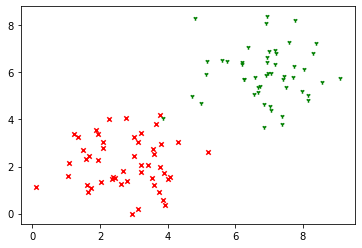

In [ ]:
x_label1 = np.random.normal(3, 1, 50)
y_label1 = np.random.normal(2, 1, 50) 
x_label2 = np.random.normal(7, 1, 50)
y_label2 = np.random.normal(6, 1, 50)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2) 
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))

plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

**Obliczamy wprost gradient funkcji błędu:**

In [ ]:
def loss_fn(y, y_model): 
  return tf.reduce_mean(-y*tf.math.log(y_model)- (1-y)*tf.math.log(1-y_model))

In [ ]:
import random
a = tf.Variable(random.random())
b = tf.Variable(random.random())
c = tf.Variable(random.random())

In [ ]:
Loss = []
epochs = 1000
lr = 0.001

for _ in range(epochs):
  with tf.GradientTape() as tape:
    labels_model = tf.sigmoid(a * xs + b * ys + c)
    #print("wartość: ", tf.sigmoid(a * xs + b * ys + c))
    
    loss = loss_fn(labels, labels_model)
    #print(loss.numpy())
    Loss.append(loss.numpy())
 
  dloss_da, dloss_db, dloss_dc = tape.gradient(loss,(a, b, c))
 
  a.assign_sub(lr*dloss_da)
  b.assign_sub(lr*dloss_db)
  c.assign_sub(lr*dloss_dc)

In [ ]:
np.max(Loss),np.min(Loss)

(0.84210587, 0.5818298)

In [ ]:
print(a.numpy())
print(b.numpy())
print(c.numpy())

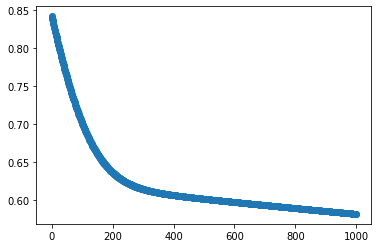

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

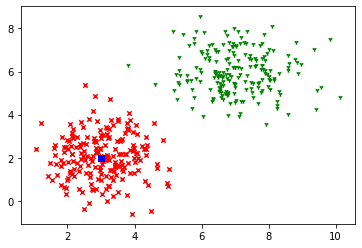

In [ ]:
x=3.0
y=2.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter([x],[y],c='b', marker='s')
plt.show()

**wartość uzyskana w wyniku uczenia:**

In [ ]:
print("min: ", min(labels_model.numpy()))
print("max: ", max(labels_model.numpy()))

min:  0.00019717216
max:  0.9998212


**================================================================================================================================================================================================**

**Zad 2:**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

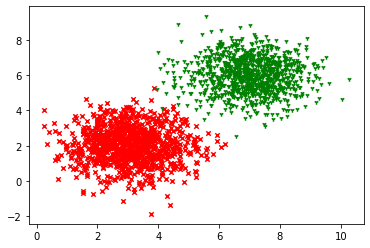

In [ ]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000) 
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2) 
#labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))
labels = np.array([[1.,0.]]*len(x_label1)+[[0.,1.]]*len(x_label2))

plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

Definiujemy model:

In [ ]:
model = Sequential()
model.add(Dense(units = 2, use_bias=True, input_dim=2, activation = "softmax"))
opt = keras.optimizers.Adam(learning_rate=0.1)
#opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt)
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


Ze współrzędnych **x** i **y** tworzymy **macierz o dwóch kolumnach** odpowiadających tym współrzędnym:

In [ ]:
xs = xs.reshape(-1,1)
ys = ys.reshape(-1,1)
data_points = np.concatenate([xs,ys],axis=1)

In [ ]:
data_points

array([[3.43492706, 1.40039249],
       [3.29850082, 2.63734794],
       [4.04839666, 3.18604337],
       ...,
       [6.55175493, 6.61461039],
       [7.40347376, 5.14934226],
       [4.96505565, 6.2328364 ]])

Pętla ucząca:

In [ ]:
epochs = 100
h = model.fit(data_points,labels, verbose=0, epochs=epochs, batch_size=1000)

In [ ]:
Loss = h.history['loss']

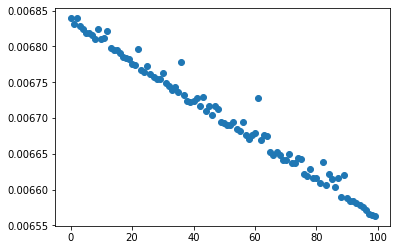

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

Sprawdzamy dla pewnego punktu:

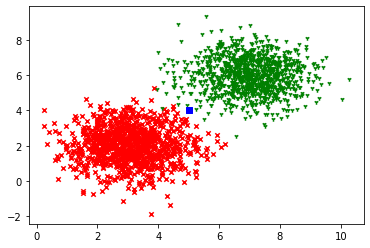

In [ ]:
x=5.0
y=4.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter([x],[y],c='b', marker='s')
plt.show()

In [ ]:
resultArray = model.predict([[x,y]])
print("%.16f" % resultArray[0][0])
print("%.16f" % resultArray[0][1])

0.3754206299781799
0.6245793700218201


## Podział na **zbiory treningowy** i **walidacyjny**

**b) c)**

In [ ]:
model = Sequential()
model.add(Dense(units = 2, use_bias=True, input_dim=2, activation = "softmax"))
opt = keras.optimizers.Adam(learning_rate=0.1)
#opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


Parametr **validation_split** określa jaka część zbioru danych będzie wykorzystana do **testów (walidacji)**

In [ ]:
epochs = 1000
h = model.fit(data_points,labels, verbose=0, validation_split=0.2, epochs=epochs, batch_size=1000)

In [ ]:
h.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Zmiana błędu na danych treningowych i walidacyjnych:

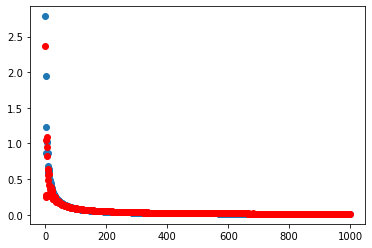

In [ ]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

**================================================================================================================================================================================================**

**Zad 3:**

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense

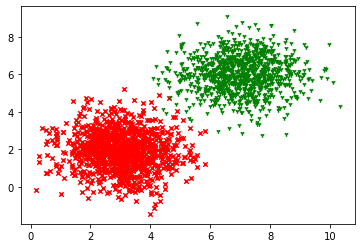

In [ ]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000) 
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2) 
#labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))
labels = np.array([[1.,0.]]*len(x_label1)+[[0.,1.]]*len(x_label2))

plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

**Obliczamy wprost gradient funkcji błędu:**

In [ ]:
loss_fn = tf.keras.losses.BinaryCrossentropy()

In [ ]:
import random
a = tf.Variable(np.random.random((2,2)))
b = tf.Variable(np.random.random((2)))
c = tf.Variable(np.random.random((2)))

In [ ]:
Loss = []
epochs = 1000
lr = 0.001

for _ in range(epochs):
  with tf.GradientTape() as tape:
    labels_model = tf.nn.softmax(a * xs + b * ys + c)
    #print("wartość: ", tf.sigmoid(a * xs + b * ys + c))
    
    loss = loss_fn
    #print(loss.numpy())
    Loss.append(loss.numpy())
 
  dloss_da, dloss_db, dloss_dc = tape.gradient(loss,(a, b, c))
 
  a.assign_sub(lr*dloss_da)
  b.assign_sub(lr*dloss_db)
  c.assign_sub(lr*dloss_dc)

InvalidArgumentError: ignored

In [ ]:
np.max(Loss),np.min(Loss)

In [ ]:
plt.scatter(np.arange(epochs),Loss)
plt.show()

In [ ]:
x=3.0
y=2.0
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter([x],[y],c='b', marker='s')
plt.show()

wartość uzyskana w wyniku uczenia:

In [ ]:
print("min: ", min(labels_model.numpy()))
print("max: ", max(labels_model.numpy()))